In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## STEPS

### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing
### 4. Model building
### 5. Evaluation

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
# renaming the cols
df.rename(columns = {'v1':'target','v2':'text'},inplace= True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# duplicates values
df.duplicated().sum()

403

In [14]:
# dropping duplicated values
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

# 2 . EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

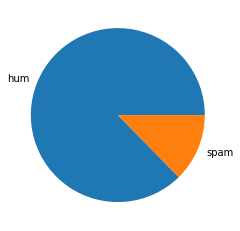

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['hum','spam'])
plt.show()

### data is imbalanced

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SRI RENUKA
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_char'] = df['text'].apply(len)

In [22]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df['num_sens'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
# ham
df[df["target"] == 0].iloc[:,2:].describe()

,num_char,num_words,num_sens
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
# spam
df[df["target"] == 1].iloc[:,2:].describe()

,num_char,num_words,num_sens
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

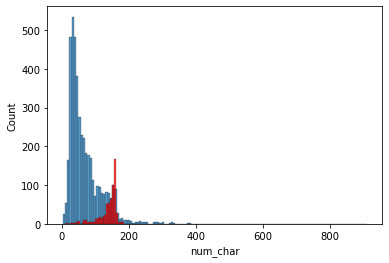

In [27]:
sns.histplot(df[df["target"] == 0]['num_char'])
sns.histplot(df[df["target"] == 1]['num_char'],color='r')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

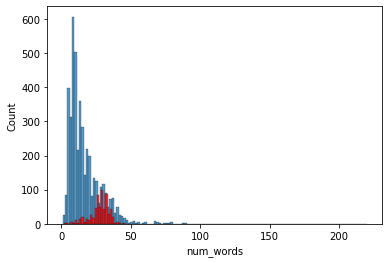

In [28]:
sns.histplot(df[df["target"] == 0]['num_words'])
sns.histplot(df[df["target"] == 1]['num_words'],color='r')

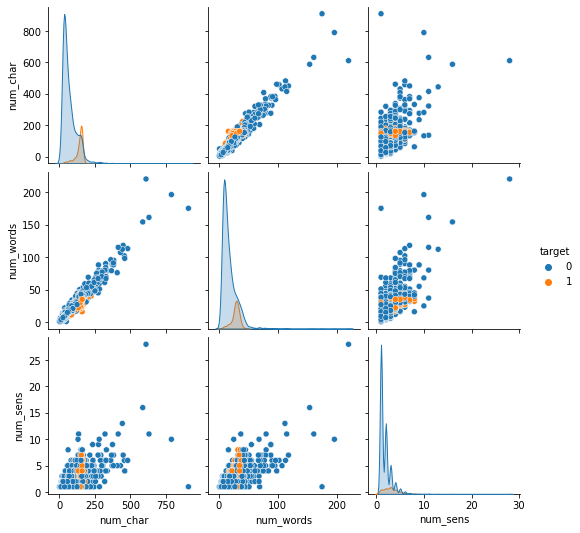

In [29]:
sns.pairplot(df,hue ='target')

<AxesSubplot:>

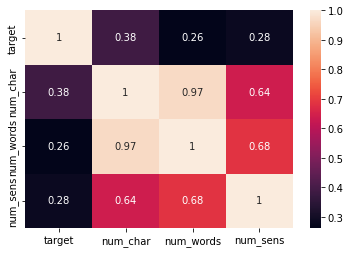

In [30]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

In [31]:
df.head()

,target,text,num_char,num_words,num_sens
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_txt(text):
    
    #lowering the text
    text= text.lower()
    
    #tokenizing
    text = nltk.word_tokenize(text)
    
    # removing special chars
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # removing stopwords and punctions
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # stemmimg
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    
    
    

In [33]:
df['transformed_txt'] = df['text'].apply(transform_txt)

In [34]:
df.head()

,target,text,num_char,num_words,num_sens,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer()

In [66]:
x = tfid.fit_transform(df['transformed_txt']).toarray()

In [67]:
x.shape

(5169, 6708)

In [68]:
y = df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [75]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [76]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


# tfid --> mnb 

In [78]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [105]:
df.sample()[['target','text']]

,target,text
4927,0,Just hopeing that wasnÛ÷t too pissed up to re...
